In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.CAMVID_TINY)

In [4]:
dls = SegmentationDataLoaders.from_label_func(
path, bs=8, fnames = get_image_files(path/"images"), label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}', codes = np.loadtxt(path/'codes.txt', dtype=str)
    )

In [5]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.943909,2.450223,00:06


epoch,train_loss,valid_loss,time
0,1.807485,1.525859,00:01
1,1.596945,1.375166,00:01
2,1.444843,1.126372,00:01
3,1.292607,1.094790,00:01
4,1.183859,0.946408,00:01
5,1.074139,0.956172,00:01
6,0.983201,0.807969,00:01
7,0.909763,0.797355,00:01


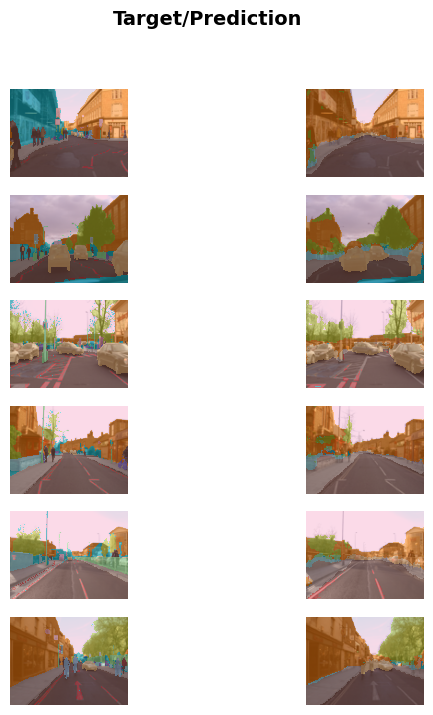

In [6]:
learn.show_results(max_n=6, figsize=(7,8))